In [2]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
import sklearn as sk

In [3]:
train = pd.read_csv("train.csv")

train.corr().sort_values('SalePrice', ascending=False).index
train.corr()


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,1.000000,0.011156,-0.010601,-0.033226,-0.028365,0.012609,-0.012713,-0.021998,-0.050298,-0.005024,...,-0.029643,-0.000477,0.002889,-0.046635,0.001330,0.057044,-0.006242,0.021172,0.000712,-0.021917
MSSubClass,0.011156,1.000000,-0.386347,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.022936,-0.069836,...,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.084284
LotFrontage,-0.010601,-0.386347,1.000000,0.426095,0.251646,-0.059213,0.123349,0.088866,0.193458,0.233633,...,0.088521,0.151972,0.010700,0.070029,0.041383,0.206167,0.003368,0.011200,0.007450,0.351799
LotArea,-0.033226,-0.139781,0.426095,1.000000,0.105806,-0.005636,0.014228,0.013788,0.104160,0.214103,...,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843
OverallQual,-0.028365,0.032628,0.251646,0.105806,1.000000,-0.091932,0.572323,0.550684,0.411876,0.239666,...,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982
OverallCond,0.012609,-0.059316,-0.059213,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.128101,-0.046231,...,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950,-0.077856
YearBuilt,-0.012713,0.027850,0.123349,0.014228,0.572323,-0.375983,1.000000,0.592855,0.315707,0.249503,...,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.522897
YearRemodAdd,-0.021998,0.040581,0.088866,0.013788,0.550684,0.073741,0.592855,1.000000,0.179618,0.128451,...,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,0.507101
MasVnrArea,-0.050298,0.022936,0.193458,0.104160,0.411876,-0.128101,0.315707,0.179618,1.000000,0.264736,...,0.159718,0.125703,-0.110204,0.018796,0.061466,0.011723,-0.029815,-0.005965,-0.008201,0.477493
BsmtFinSF1,-0.005024,-0.069836,0.233633,0.214103,0.239666,-0.046231,0.249503,0.128451,0.264736,1.000000,...,0.204306,0.111761,-0.102303,0.026451,0.062021,0.140491,0.003571,-0.015727,0.014359,0.386420


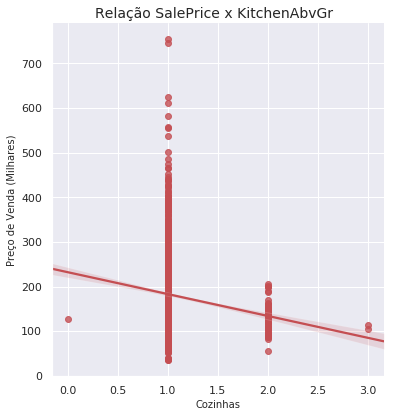

In [50]:
plot = sb.JointGrid(train["KitchenAbvGr"], train["SalePrice"]/1000, ratio=120)
plot.plot_joint(sb.regplot, color = "r")
plot.ax_marg_x.set_axis_off()
plot.ax_marg_y.set_axis_off()
plot.fig.suptitle("Relação SalePrice x KitchenAbvGr", fontsize = 14)
plt.xlabel("Cozinhas", fontsize=10)
plt.ylabel("Preço de Venda (Milhares)",fontsize=10)
plt.subplots_adjust(top=0.95)

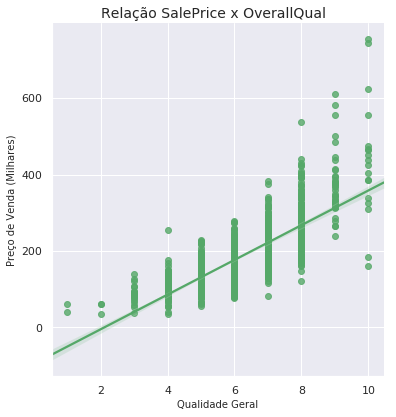

In [89]:
plot = sb.JointGrid(train["OverallQual"], train["SalePrice"]/1000, ratio=120)
plot.plot_joint(sb.regplot, color = "g")
plot.fig.suptitle("Relação SalePrice x OverallQual", fontsize = 14)
plot.ax_marg_x.set_axis_off()
plot.ax_marg_y.set_axis_off()
plt.xlabel("Qualidade Geral", fontsize=10)
plt.ylabel("Preço de Venda (Milhares)",fontsize=10)
plt.subplots_adjust(top=0.95)

Text(0.5, 1.0, 'Boxplot SalePrice x GarageType')

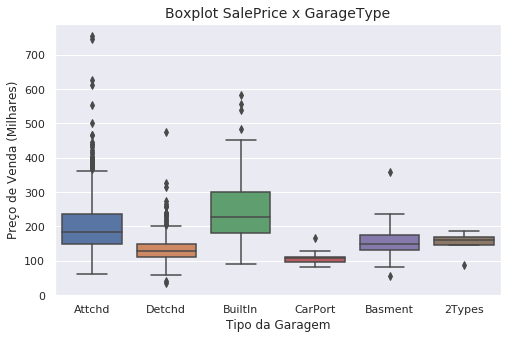

In [88]:
sb.set(rc={'figure.figsize':(8,5)})
plot = sb.boxplot(x = train["GarageType"], y = train["SalePrice"]/1000)
plot.set(xlabel='Tipo da Garagem',ylabel="Preço de Venda (Milhares)")
plot.set_title("Boxplot SalePrice x GarageType", fontsize = 14)
